In [1]:
import dtoolcore
import dtoolcore.utils as utils
import time
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import re

In [31]:
rootdir = os.getcwd()

# pat = r'canal_\d+\.\d+_\d+'
pat = r'\d+\.\d+'
path = rootdir+"/dtool_db/"
#print(path)
def get_data_directories(root_dir):
    data_dirs = []
    for root, dirs, files in os.walk(root_dir):
        if root.endswith('/data'):
            data_dirs.append(root)
    return data_dirs

datadir_list = get_data_directories(path)


def plot_res(pt, file, title, yl='Massflowrate in kg/s', fkt=np.mean, legend=False):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    for i in datadir_list:
        match = re.search(pt, i)
        extracted = match.group()
        if cu ==0:
            mfl = np.loadtxt(i+file).reshape(1, -1)
            cu += 1
            ax.scatter(float(extracted), fkt(mfl[0,:]))
        else:
            mfl = np.append(mfl, np.loadtxt(i+file).reshape(1, -1), axis=0)
            cu+=1
            ax.scatter(float(extracted),fkt(mfl[cu-1,:]))
    if legend:
        ax.legend()
    ax.set_xlabel(r'radius in r/H', fontsize=14)
    ax.set_ylabel(yl, fontsize=14)

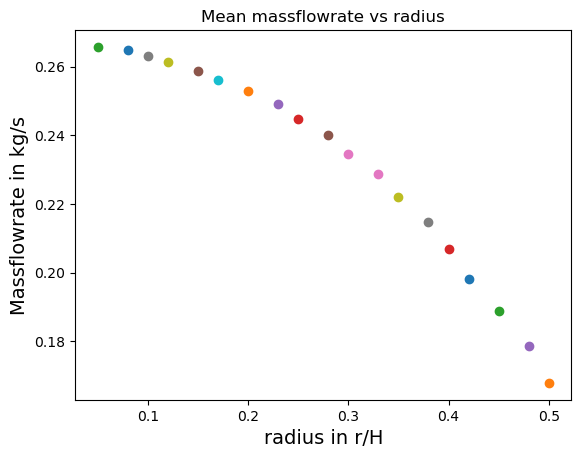

In [32]:
plot_res(pat, "/massflowrate.txt", "Mean massflowrate vs radius")

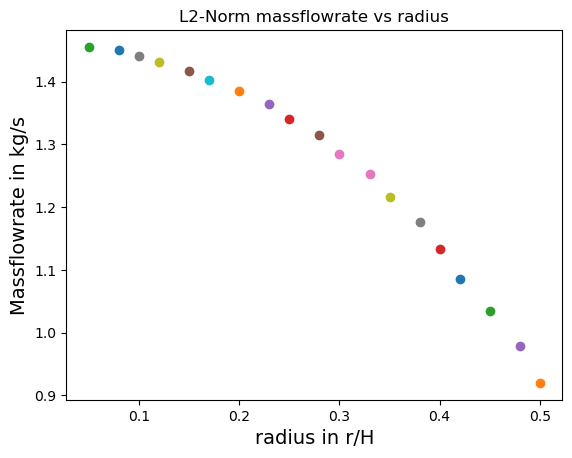

In [33]:
plot_res(pat, "/massflowrate.txt", "L2-Norm massflowrate vs radius", fkt=np.linalg.norm)


In [37]:
def ret_mid_element(x):
    return x[int(x[0].size/2)]

#plot_res(pat, "/massflowrate.txt", "massflowrate at obstacle vs radius", fkt=ret_mid_element)

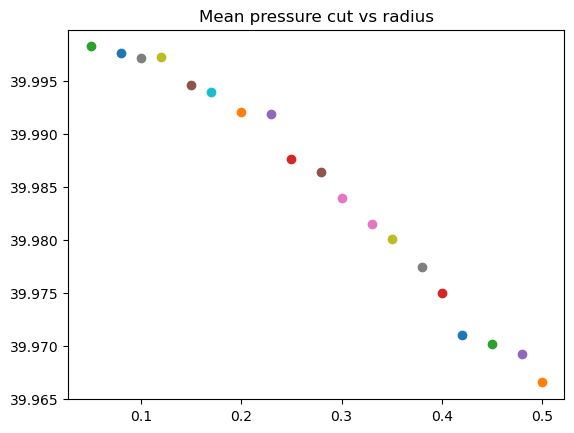

In [20]:
plot_res(pat, "/pressure_avg.txt", "Mean pressure cut vs radius", yl=)

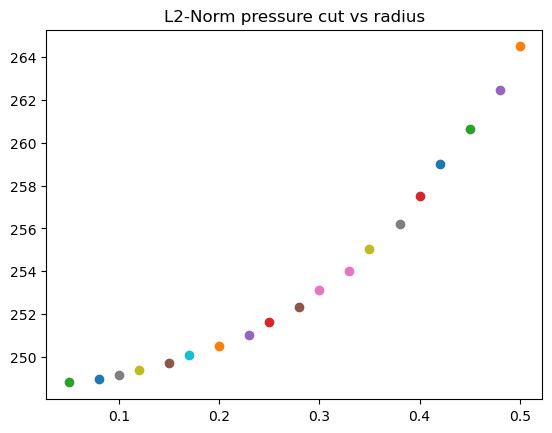

In [19]:
plot_res(pat, "/pressure_avg.txt", "L2-Norm pressure cut vs radius", fkt=np.linalg.norm)

In [36]:
#plot_res(pat, "/pressure_avg.txt", "Pressure cut at obstacle vs radius", ret_mid_element)